<a href="https://colab.research.google.com/github/pavithraus/Task-7-SVM/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear SVM Accuracy: 0.9766081871345029
RBF SVM Accuracy: 0.9883040935672515


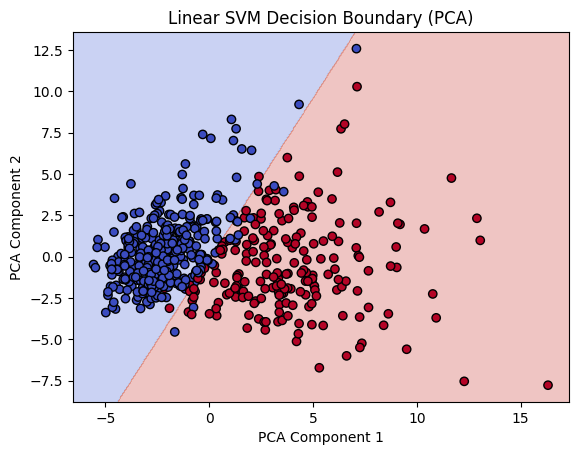

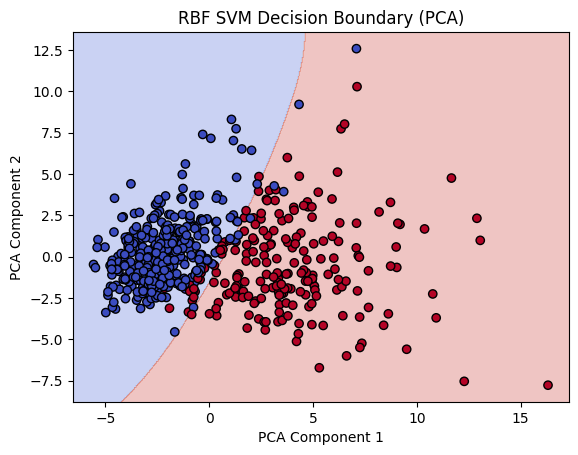

Best Params from GridSearchCV: {'C': 10, 'gamma': 0.01}
Best Cross-Validation Score: 0.9672784810126581


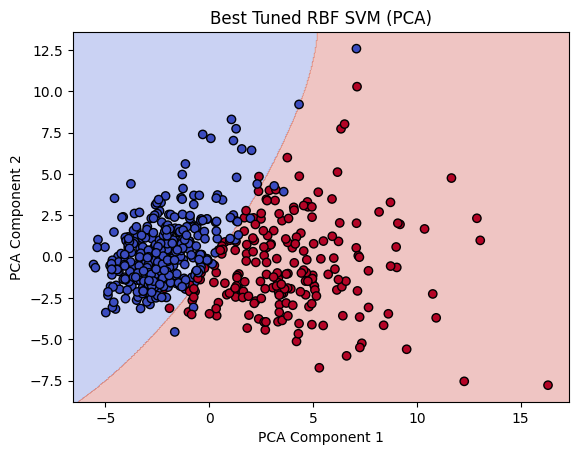

Cross-Validation Scores: [0.97368421 0.97368421 0.98245614 0.97368421 0.99115044]
Mean Accuracy: 0.9789318428815401

Confusion Matrix:
 [[108   0]
 [  2  61]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       108
           1       1.00      0.97      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

# Load Dataset
df = pd.read_csv("Breast_cancer_wisconsin.csv")

# Drop unnecessary columns
df = df.drop(columns=["id", "Unnamed: 32"], errors='ignore')

# Encode target variable (M = 1, B = 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Features and Target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Linear SVM
linear_svm = SVC(kernel='linear', C=1)
linear_svm.fit(X_train, y_train)
print("Linear SVM Accuracy:", linear_svm.score(X_test, y_test))

# RBF SVM
rbf_svm = SVC(kernel='rbf', C=1, gamma=0.01)
rbf_svm.fit(X_train, y_train)
print("RBF SVM Accuracy:", rbf_svm.score(X_test, y_test))

# Plot PCA-based Decision Boundary
def plot_decision_boundary_pca(model, X_pca, y, title):
    x_min, x_max = X_pca[:, 0].min()-1, X_pca[:, 0].max()+1
    y_min, y_max = X_pca[:, 1].min()-1, X_pca[:, 1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

plot_decision_boundary_pca(linear_svm, X_pca, y, "Linear SVM Decision Boundary (PCA)")
plot_decision_boundary_pca(rbf_svm, X_pca, y, "RBF SVM Decision Boundary (PCA)")


# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1]
}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Params from GridSearchCV:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

best_model = grid.best_estimator_
plot_decision_boundary_pca(best_model, X_pca, y, "Best Tuned RBF SVM (PCA)")

# Cross-validation Evaluation
cv_scores = cross_val_score(best_model, X_scaled, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Final Evaluation
y_pred = best_model.predict(X_test)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
